In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hst.mrw1d import generate_G_operators, save_G_operators, data_decomposition, data_reconstruction

In [2]:
# Multi-coefficient super-Gaussian data generation
def superGaussian(x, cs): 
    data_length = len(x)
    Ndata = cs.shape[0]
    input_data = np.zeros((data_length, Ndata))
    for i in range(Ndata):
        input_data[:, i] = cs[i, 0]*np.exp(-((x-cs[i, 1])/cs[i, 2])**(2*cs[i, 3]))
    return input_data

In [3]:
# Save G_operators
save_Gs = False
# Print out essential properties of G_operators
verify_Gs = True

In [4]:
# Number of multiresolution binate levels
Nlevels = 7
# Number of spatial points in one data input
data_length = 2**Nlevels * 200 # constructed as a proper  power of 2
Ndata = 15 # Number of randomized super-Gaussian profiles (small number to plot)

In [5]:
# Generate input data
domain_size = 1.0
x = np.linspace(-domain_size/2.0, domain_size/2.0, data_length)
# Random super-Gaussian c0*exp(-((x-c1)/c2)^(2*c3))
input_coeffs = np.random.rand(Ndata, 4)
# Rescale coeff values, so c0 in (0, 1), c1 in (-0.8*domain_size/2, 0.8*domain_size/2), c2 in (0, 0.125*domain_size), and c3 in {1, .., 10}
for i in range(Ndata):
    # c0 amplitude scaling is already correct
    input_coeffs[i, 0] = input_coeffs[i, 0]
    # c1 shift scaling
    input_coeffs[i, 1] = 0.8 * domain_size * (input_coeffs[i, 1] - 0.5)
    # c2 width scaling
    input_coeffs[i, 2] = 0.125 * domain_size * input_coeffs[i, 2]
    # c3 super-Gaussian power scaling
    input_coeffs[i, 3] = int(10 * input_coeffs[i, 3])
input_data = superGaussian(x, input_coeffs)

TEST: wavelet db1
G_operators generated.
Compute data decomposition:
Otrhogonality: G_lo.G_hi.H

Orthogonality: G_hi.G_lo.H

Invertibility: G_lo^H.G_lo + G_hi^H.G_hi = I
  (0, 0)	(1.0000000000000002+0j)
  (1, 1)	(1.0000000000000002+0j)
  (2, 2)	(1.0000000000000002+0j)
  (3, 3)	(1.0000000000000002+0j)
  (4, 4)	(1.0000000000000002+0j)
  (5, 5)	(1.0000000000000002+0j)
  (6, 6)	(1.0000000000000002+0j)
  (7, 7)	(1.0000000000000002+0j)
  (8, 8)	(1.0000000000000002+0j)
  (9, 9)	(1.0000000000000002+0j)
  (10, 10)	(1.0000000000000002+0j)
  (11, 11)	(1.0000000000000002+0j)
  (12, 12)	(1.0000000000000002+0j)
  (13, 13)	(1.0000000000000002+0j)
  (14, 14)	(1.0000000000000002+0j)
  (15, 15)	(1.0000000000000002+0j)
  (16, 16)	(1.0000000000000002+0j)
  (17, 17)	(1.0000000000000002+0j)
  (18, 18)	(1.0000000000000002+0j)
  (19, 19)	(1.0000000000000002+0j)
  (20, 20)	(1.0000000000000002+0j)
  (21, 21)	(1.0000000000000002+0j)
  (22, 22)	(1.0000000000000002+0j)
  (23, 23)	(1.0000000000000002+0j)
  (24, 24)

/opt/anaconda3/lib/python3.11/site-packages/scipy/sparse/_coo.py:164: ComplexWarning: Casting complex values to real discards the imaginary part
  self.row = np.array(row, copy=copy, dtype=idx_dtype)
/opt/anaconda3/lib/python3.11/site-packages/scipy/sparse/_coo.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  self.col = np.array(col, copy=copy, dtype=idx_dtype)


G_lo.shape (12800, 25600), phi.shape (25600, 15), phi count 384000, G_lo count_nonzero 25600
G_lo.shape (6400, 12800), phi.shape (12800, 15), phi count 192000, G_lo count_nonzero 12800
G_lo.shape (3200, 6400), phi.shape (6400, 15), phi count 96000, G_lo count_nonzero 6400
G_lo.shape (1600, 3200), phi.shape (3200, 15), phi count 48000, G_lo count_nonzero 3200
G_lo.shape (800, 1600), phi.shape (1600, 15), phi count 24000, G_lo count_nonzero 1600
G_lo.shape (400, 800), phi.shape (800, 15), phi count 12000, G_lo count_nonzero 800
G_lo.shape (200, 400), phi.shape (400, 15), phi count 6000, G_lo count_nonzero 400
Decomposition done!
Compute data reconstruction:
G_lo.H.shape (400, 200), bar_phi.shape (200, 15), bar_phi count 3000, G_lo count_nonzero 400
G_lo.H.shape (800, 400), bar_phi.shape (400, 15), bar_phi count 6000, G_lo count_nonzero 800
G_lo.H.shape (1600, 800), bar_phi.shape (800, 15), bar_phi count 12000, G_lo count_nonzero 1600
G_lo.H.shape (3200, 1600), bar_phi.shape (1600, 15), b

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


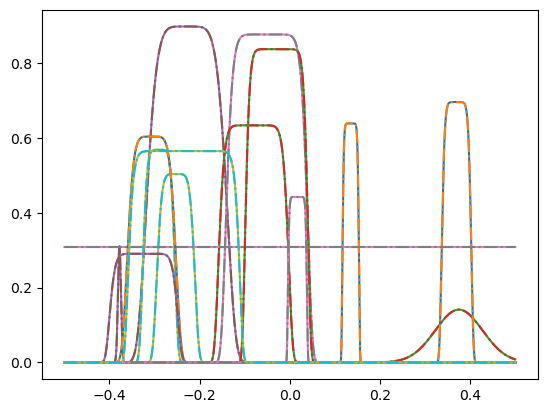

TEST: wavelet db2
G_operators generated.
Compute data decomposition:
Otrhogonality: G_lo.G_hi.H
  (0, 0)	(4.85722573273506e-17+0j)
  (1, 1)	(2.0816681711721685e-17+0j)
  (2, 2)	(2.0816681711721685e-17+0j)
  (3, 3)	(2.0816681711721685e-17+0j)
  (4, 4)	(2.0816681711721685e-17+0j)
  (5, 5)	(2.0816681711721685e-17+0j)
  (6, 6)	(2.0816681711721685e-17+0j)
  (7, 7)	(2.0816681711721685e-17+0j)
  (8, 8)	(2.0816681711721685e-17+0j)
  (9, 9)	(2.0816681711721685e-17+0j)
  (10, 10)	(2.0816681711721685e-17+0j)
  (11, 11)	(2.0816681711721685e-17+0j)
  (12, 12)	(2.0816681711721685e-17+0j)
  (13, 13)	(2.0816681711721685e-17+0j)
  (14, 14)	(2.0816681711721685e-17+0j)
  (15, 15)	(2.0816681711721685e-17+0j)
  (16, 16)	(2.0816681711721685e-17+0j)
  (17, 17)	(2.0816681711721685e-17+0j)
  (18, 18)	(2.0816681711721685e-17+0j)
  (19, 19)	(2.0816681711721685e-17+0j)
  (20, 20)	(2.0816681711721685e-17+0j)
  (21, 21)	(2.0816681711721685e-17+0j)
  (22, 22)	(2.0816681711721685e-17+0j)
  (23, 23)	(2.081668171172168

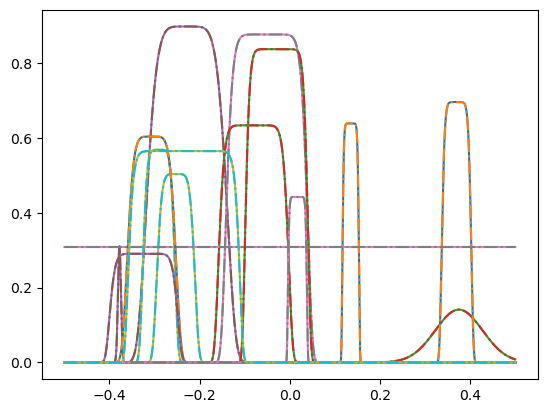

TEST: wavelet sdw2
G_operators generated.
Compute data decomposition:
Otrhogonality: G_lo.G_hi.H
  (0, 1)	-2.7755575615628914e-17j
  (0, 0)	(3.226585665316861e-16-1.491862189340054e-16j)
  (1, 1)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (1, 0)	-2.7755575615628914e-17j
  (2, 2)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (3, 3)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (4, 4)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (5, 5)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (6, 6)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (7, 7)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (8, 8)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (9, 9)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (10, 10)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (11, 11)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (12, 12)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (13, 13)	(-1.0408340855860843e-17+1.734723475976807e-17j)
  (14, 14)	(-1.04

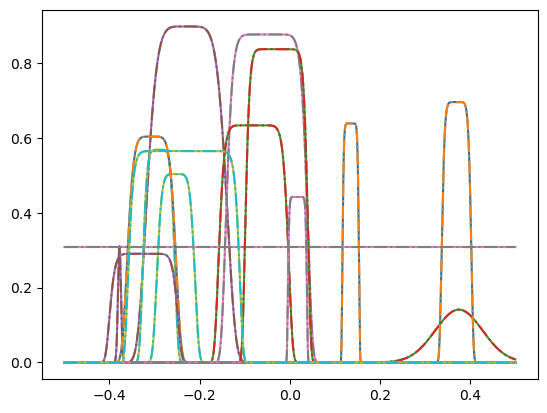

In [6]:
# Wavelet basis used for data decomposition (transformation) and reconstruction (inverse transformation)
wavelets = ['db1', 'db2', 'sdw2']
for wavelet in wavelets:
    print(f'TEST: wavelet {wavelet}')
    # Generate orthogonal G_lo (aka G) and G_hi (aka bar_G) operators
    G_operators = generate_G_operators(wavelet, Nlevels, data_length)
    print('G_operators generated.')
    if (save_Gs):
        # Save generated G_operators using dictionary
        file_name = f'G_operators_{wavelet}.npz'
        save_G_operators(G_operators, file_name)
        print(f'G_operators saved into {file_name}.')
    # Generate data decomposition into (phi_J, bar_phi_J, .., bar_phi_1)
    print('Compute data decomposition:')
    decomposition = data_decomposition(G_operators, input_data, verify_Gs)
    print('Decomposition done!')
    # Coarse phi_J interpretation
    cA = decomposition[0]
    #print(f'wavelet {wavelet}, cA')
    #print(f'{cA}')

    # Generate data reconstruction from (phi_J, bar_phi_J, .., bar_phi_1) 
    print('Compute data reconstruction:')
    reconstructed_data = data_reconstruction(decomposition, G_operators)
    print('Reconstruction done!')

    # Verification of direct and inverse multiresolution decomposition and reconstruction
    print(f'Verfication of the multiresolution decomposition and inverse reconstruction:')
    print(f'input_data.shape {input_data.shape}, reconstructed_data.shape {reconstructed_data.shape}')
    print('input_data[:, :] - reconstructed_data[:, :]')
    print(f'{input_data[:, :] - reconstructed_data[:, :]}')

    # Plot results
    for i in range(Ndata):
        plt.plot(x, input_data[:, i])
        plt.plot(x, reconstructed_data[:, i], '-.')
    plt.show()